In [1]:
# read the data and set the datetime as the index
import pandas as pd
import pandas_profiling
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import datetime

from collections import Counter

In [2]:
url = 'https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv?token=AYxzdiGnjM610dBT7PuwUnUNOmm3bGcvks5ZFDyLwA%3D%3D'
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(bikes, minimal=True)
profile.to_file(output_file="Bike_Share.html")

C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Temperature')

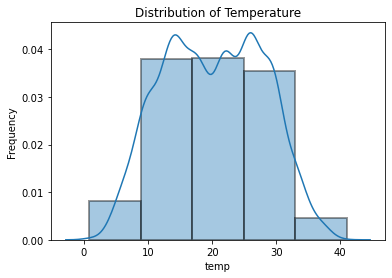

In [4]:
import seaborn as sns
sns.distplot(bikes['temp'], bins=5, kde=True,hist_kws=dict(edgecolor="black",linewidth=2))
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

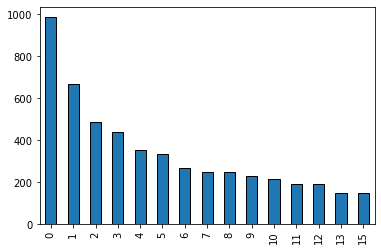

In [5]:
bikes['casual'].value_counts()[:15].plot(kind='bar',edgecolor='black')

In [6]:
def type_func(x):
    season = x
    if season==1:
        return 'Spring'
    elif season==2:
        return 'Summer'
    elif season==3:
        return 'Fall'
    elif season==4:
        return 'Winter'
bikes['SeasonType'] = bikes['season'].apply(type_func)
def type_func1(x):
    season = x
    if season==1:
        return 'Clear'
    elif season==2:
        return 'Cloudy'
    elif season==3:
        return 'Light snow and rain'
    elif season==4:
        return 'Heavy showers'
bikes['WeatherType'] = bikes['weather'].apply(type_func1)

Text(0.5, 1.0, 'Bike rides by weather and holiday')

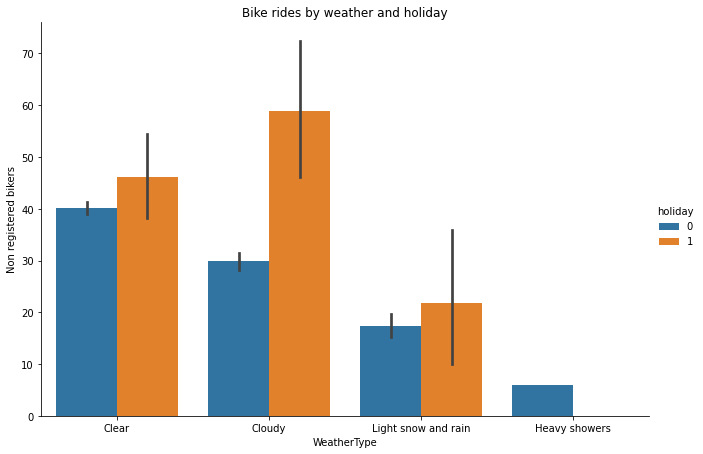

In [7]:
ax = sns.catplot(x="WeatherType", y="casual", hue="holiday", data=bikes, 
                    kind="bar",aspect=1.5, height=6)
ax.set(ylabel='Non registered bikers')
plt.title('Bike rides by weather and holiday')

Text(0.5, 1.0, 'Bike rides by season type and holiday')

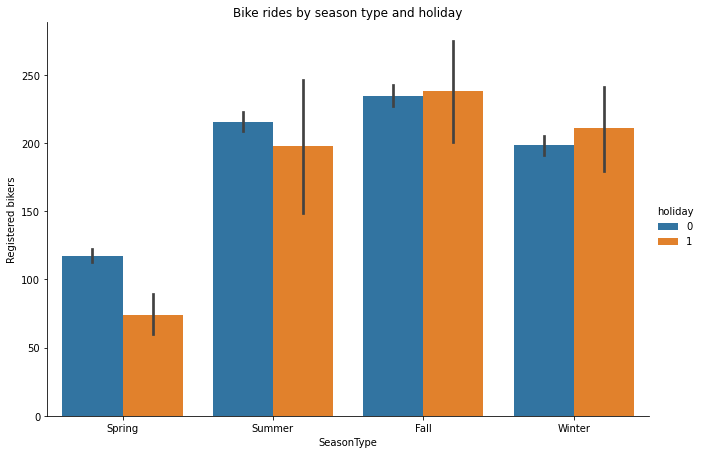

In [8]:
ax = sns.catplot(x="SeasonType", y="count", hue="holiday", data=bikes, 
                    kind="bar",aspect=1.5, height=6)
ax.set(ylabel='Registered bikers')
plt.title('Bike rides by season type and holiday')

Text(0.5, 1.0, 'Scatterplot of passengers grouped by Fare and Age')

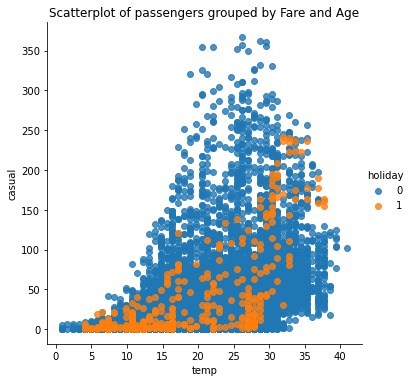

In [9]:
sns.lmplot(x='temp', y='casual', data=bikes, fit_reg=False, hue="holiday")
plt.title('Scatterplot of passengers grouped by Fare and Age')

Text(0.5, 1.0, 'Scatterplot of registered riders based on temperature')

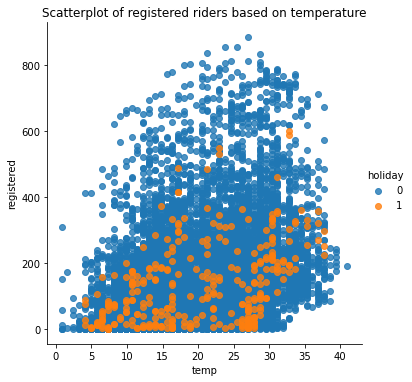

In [10]:
sns.lmplot(x='temp', y='registered', data=bikes, fit_reg=False, hue="holiday")
plt.title('Scatterplot of registered riders based on temperature')

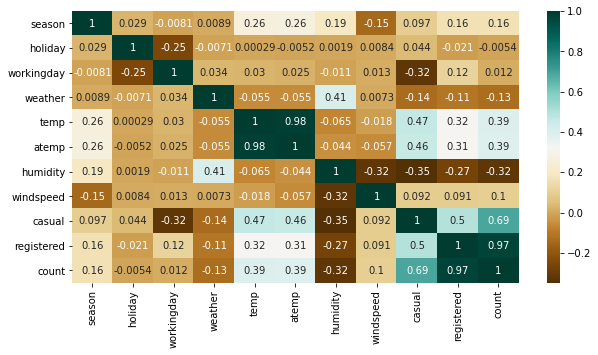

In [11]:
plt.subplots(figsize=(10,5))
sns.heatmap(bikes.corr(),cmap="BrBG",annot=True)

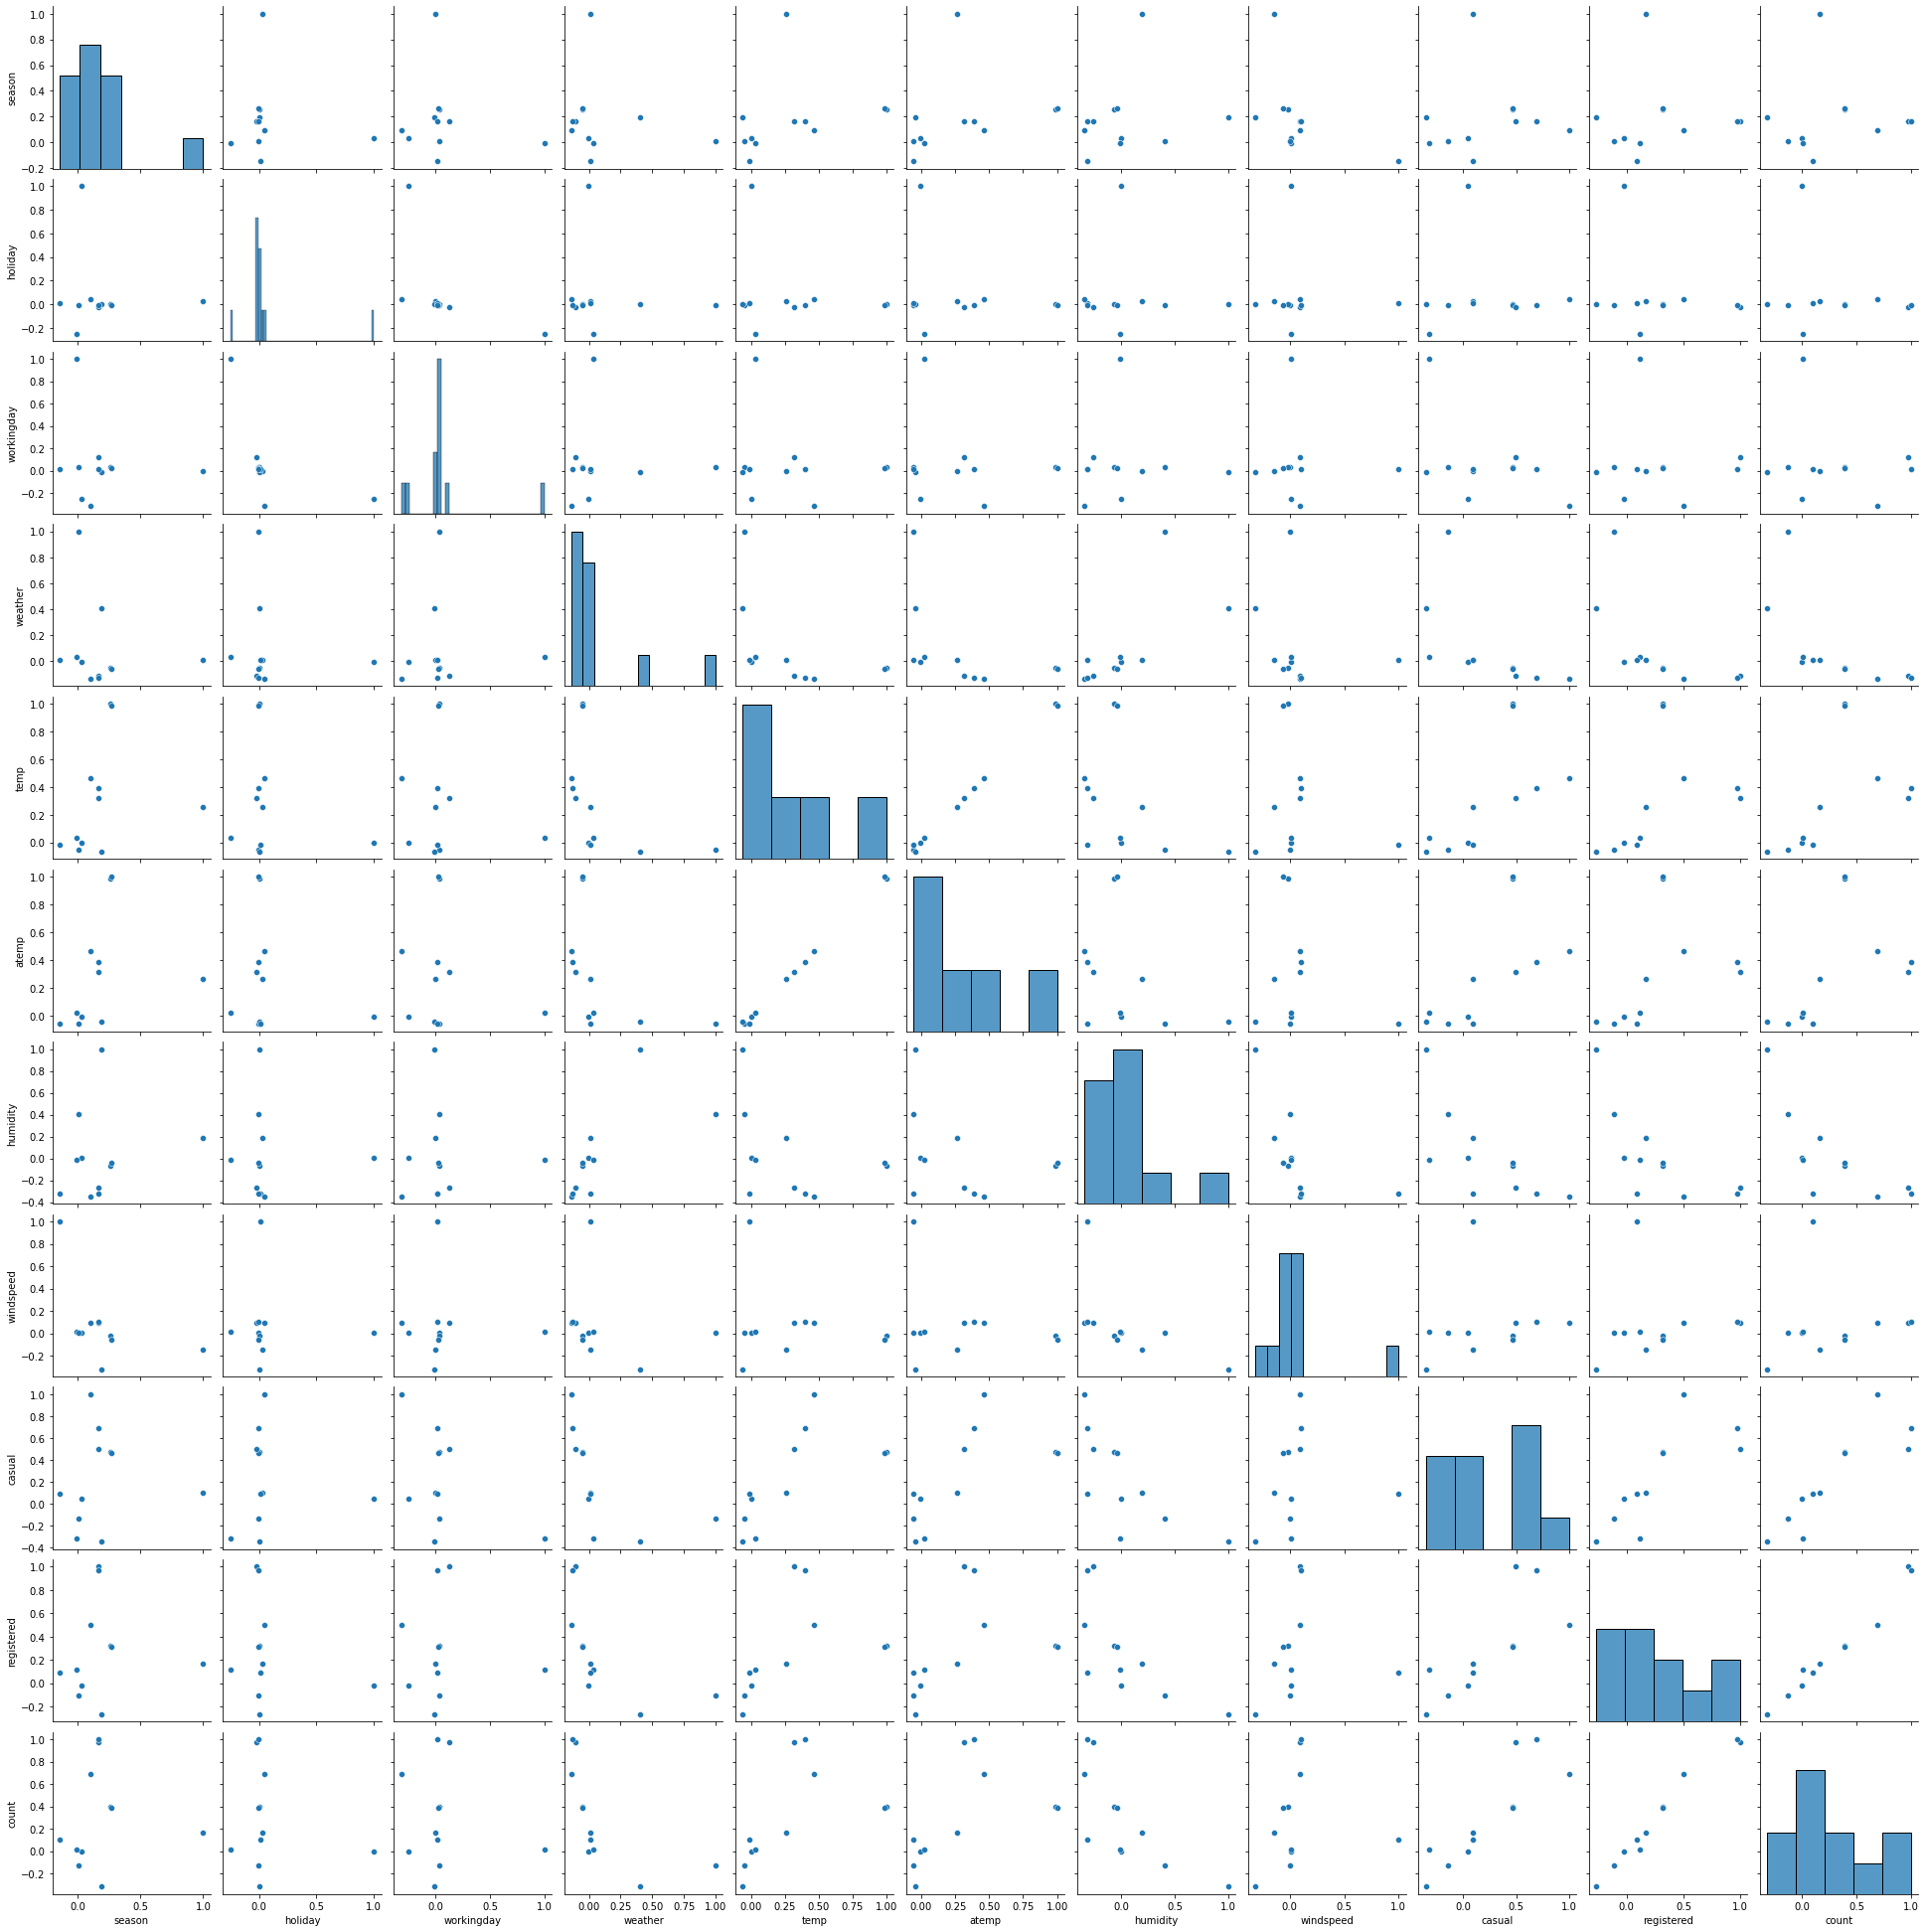

In [12]:
sns.pairplot(bikes.corr())

In [13]:
bikes['Date']=bikes.index.values

In [14]:
bikes['Date']=pd.to_datetime(bikes['Date'])
bikes['year']=bikes['Date'].dt.year
bikes['month']=bikes['Date'].dt.month
bikes['day']=bikes['Date'].dt.day
bikes['time']=bikes['Date'].dt.hour
bikes['day_week']=bikes['Date'].dt.day_name()


In [15]:
bikes.tail(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,SeasonType,WeatherType,Date,year,month,day,time,day_week
datetime,,,,,,,,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Winter,Clear,2012-12-19 19:00:00,2012,12,19,19,Wednesday
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter,Clear,2012-12-19 20:00:00,2012,12,19,20,Wednesday
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Winter,Clear,2012-12-19 21:00:00,2012,12,19,21,Wednesday
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Winter,Clear,2012-12-19 22:00:00,2012,12,19,22,Wednesday
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,Winter,Clear,2012-12-19 23:00:00,2012,12,19,23,Wednesday


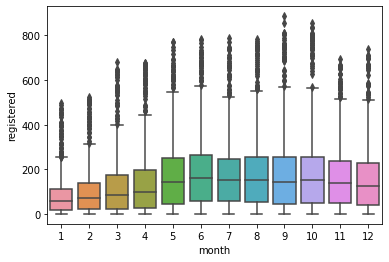

In [16]:
sns.boxplot(x="month", y="registered",data = bikes)

<Figure size 1080x504 with 0 Axes>

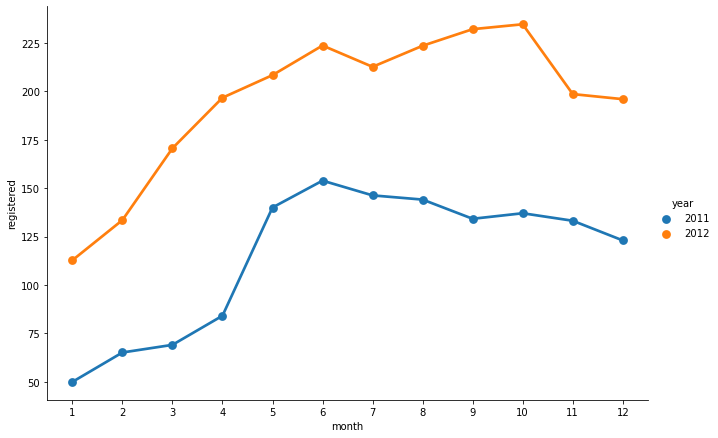

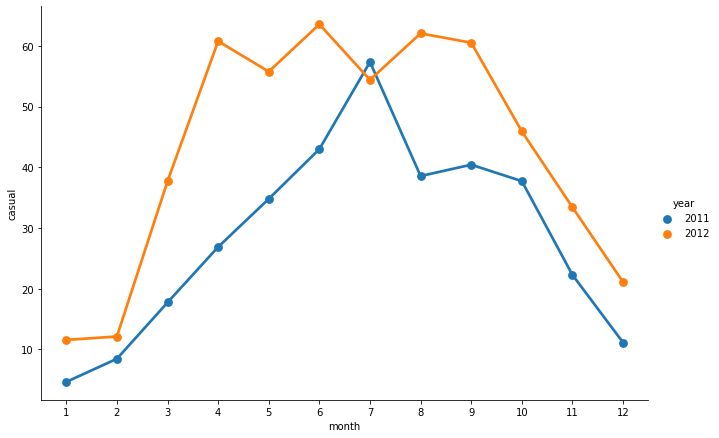

In [17]:
fig = plt.figure(figsize=[15,7])
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
sns.catplot(x="month", y="registered", hue="year", data=bikes, 
                    kind="point",aspect=1.5, height=6,ci=None)

sns.catplot(x="month", y="casual", hue="year", data=bikes, 
                    kind="point",aspect=1.5, height=6,ci=None)

#fig.title('Number of rentals month and year wise ')

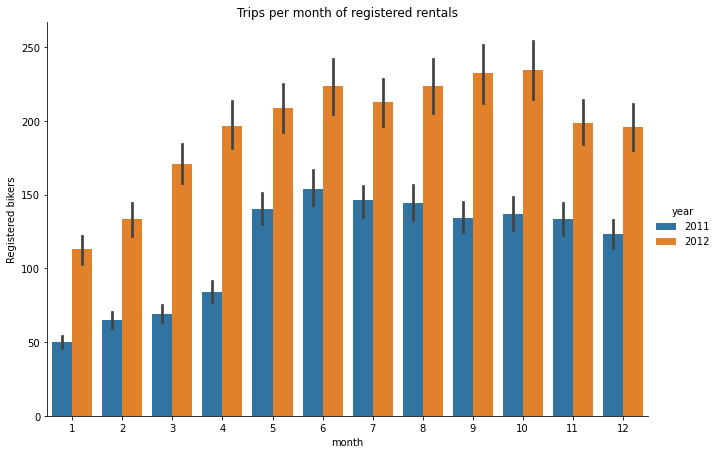

In [18]:
ax = sns.catplot(x="month", y="registered", hue="year", data=bikes, 
                    kind="bar",aspect=1.5, height=6)
ax.set(ylabel='Registered bikers')
plt.title('Trips per month of registered rentals');

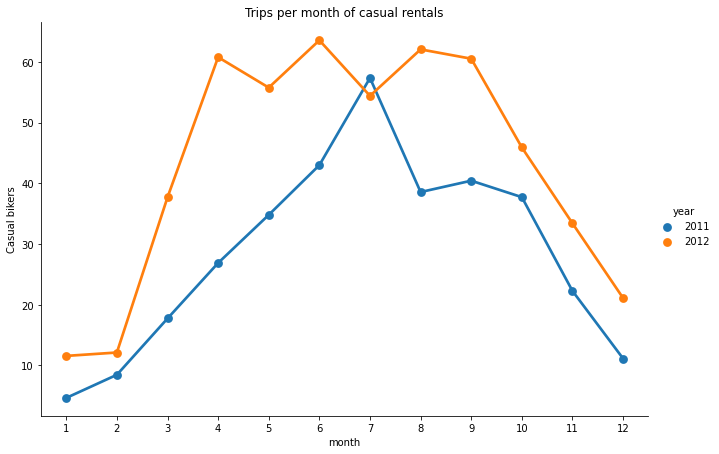

In [19]:
ax = sns.catplot(x="month", y="casual", hue="year", data=bikes, 
                    kind="point",aspect=1.5, height=6,ci=None)
ax.set(ylabel='Casual bikers')
plt.title('Trips per month of casual rentals');

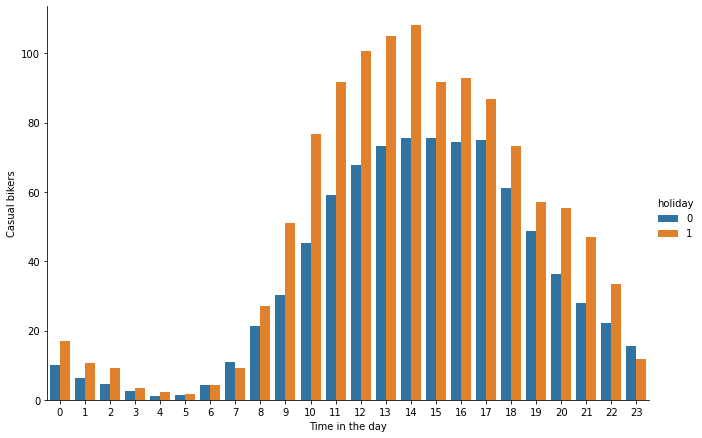

In [20]:
ax = sns.catplot(x="time", y="casual", hue="holiday", data=bikes, 
                    kind="bar",aspect=1.5, height=6,ci=None)
ax.set(ylabel='Casual bikers')
ax.set(xlabel='Time in the day')
#plt.title('Trips per month of casual rentals');

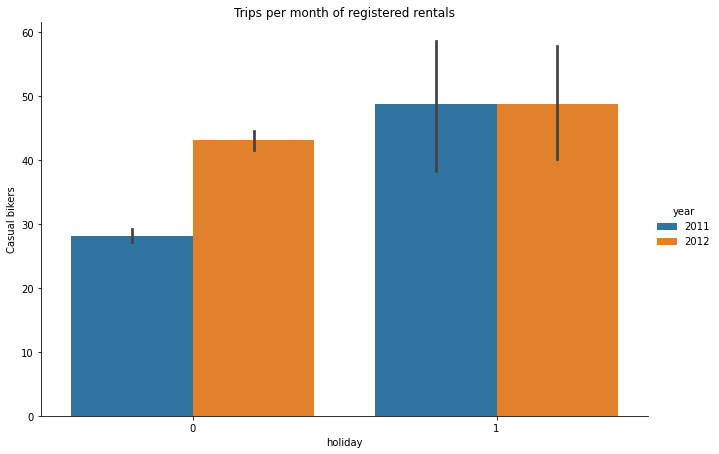

In [21]:
ax = sns.catplot(x="holiday", y="casual", hue="year", data=bikes, 
                    kind="bar",aspect=1.5, height=6)
ax.set(ylabel='Casual bikers')
plt.title('Trips per month of registered rentals');

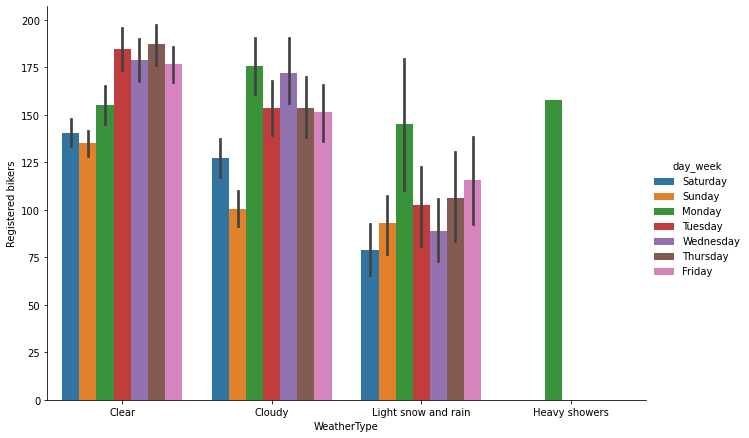

In [22]:
ax = sns.catplot(x="WeatherType", y="registered", hue="day_week", data=bikes, 
                    kind="bar",aspect=1.5, height=6)
ax.set(ylabel='Registered bikers')
#plt.title('Trips per month of registered rentals');